In [1]:
#import needed libraries (although not all imported below are used in the given code)

import os
from os import listdir
from os.path import isfile, join

import sys
import codecs
import fileinput
import string
from collections import OrderedDict

import numpy as np

from pandas import DataFrame
import pandas as pd

import matplotlib

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as md
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

#from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import optimize, stats
from scipy.integrate import quad
from scipy.signal import find_peaks, peak_widths,hilbert

from decimal import Decimal



import iminuit 


import csv
import cmath
import math
from math import sqrt





#function to count number of significant digits after comma
def number_sigdigs(x):
    digs_after_comma = str(x - math.floor(x))
    digs_after_comma = digs_after_comma[2:]
    number=0
    for c in digs_after_comma:
        if c=='0':
            number+=1
        else:
            number+=2
            break
    return number

print('numpy version', np.__version__)
print('matplotlib version', matplotlib.__version__)
print('pandas version', pd.__version__)
print('scipy version', scipy.__version__)
print('iminuit version', iminuit.__version__)

numpy version 1.21.6
matplotlib version 3.5.3
pandas version 1.1.5
scipy version 1.7.3
iminuit version 2.18.0


In [2]:

# destination to the data (input) and output folders (change according to the path on your PC)

containing_folder_path = "/home/amslivar/work/AmBe_v2/AmBe_characterization_analysis/"
path_base = containing_folder_path + "AmBe_symmetricW_withAttenuator_endcap/"
measurement_path= path_base +'Data/'
measurement_output_path= path_base + 'Results/'

#calibration parameters
p0=11.66
p1=0.5558


In [3]:
# read the data files from measurement_path folder and replace "," delimiter with "."

files_in_folder = [f for f in listdir (measurement_path) if isfile(join(measurement_path, f))]
files_in_folder.sort()

for f in files_in_folder:
    
    name = 0

    # Read in the file
    with open(measurement_path+f, 'r') as input_file :
        filedata = input_file.read()

         # Replace the target string
        filedata = filedata.replace(",", ".")

    # Write the file out again
    with open(measurement_path+f, 'w') as input_file:
        input_file.write(filedata)
    input_file.close()

In [5]:
# read the data files and put the content into list of dataframes

numbers=np.linspace(0,8191,num=8192)
numbers=list(numbers)

import re

scan = [] #list of measurement data (in DataFrame format) extracted from scan files
files_scan=[] #list of measurement files

for f in files_in_folder:
    if "AmBe" in f: #choose only files with names containing "AmBe-2"
        print("AmBe files")
        print(f) #prints scan file name
        files_scan.append(f)
        


        scan_temp = pd.read_csv(measurement_path + f, #read file content in DataFrame format
            skiprows=(0,1),
            header=None,
            delimiter="\t",
            )
        print(scan_temp) #prints measurement file data in DataFrame format
        scan.append(scan_temp) # add the dataframe to the list

for f in files_in_folder:
    
    if "background" in f: #choose only files with names containing "Background"
        print("Background files")
        print(f) #prints scan file name
        files_scan.append(f) 
        


        scan_temp = pd.read_csv(measurement_path + f, #read file content in DataFrame format
            skiprows=(0,1),
            header=None,
            delimiter="\t",
            )
        print(scan_temp) #prints measurement file data in DataFrame format
        
        scan.append(scan_temp) # add the dataframe to the list

        

#combine background data
bkg=np.asarray(scan[1][1])

#provide background and AmBe measurement time
t_bkg=64517.94
t=17901.76

AmBe files
AmBe_Run_with_atten_6hrs.dat
                             0
0                0           0
1                1           0
2                2           0
3                3           0
4                4           0
...                        ...
8187          8187           0
8188          8188           0
8189          8189           0
8190          8190           0
8191          8191           0

[8192 rows x 1 columns]
Background files
background_run_with_atten_04232024.dat
                             0
0                0           0
1                1           0
2                2           0
3                3           0
4                4           0
...                        ...
8187          8187           0
8188          8188           0
8189          8189           0
8190          8190           0
8191          8191           0

[8192 rows x 1 columns]


KeyError: 1

In [7]:
#checking that the measurement files have been read and written in the right order

i=0
while i<len(files_scan):
    print(i, files_scan[i])
    i+=1


0 AmBe_Run_with_atten_6hrs.dat


<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, AmBe-2 with W capsule, with attenuator')

Text(0.5, 0, 'Channel')

Text(0, 0.5, 'Rate, [s$^{-1}$]')

<Figure size 1700x1400 with 0 Axes>

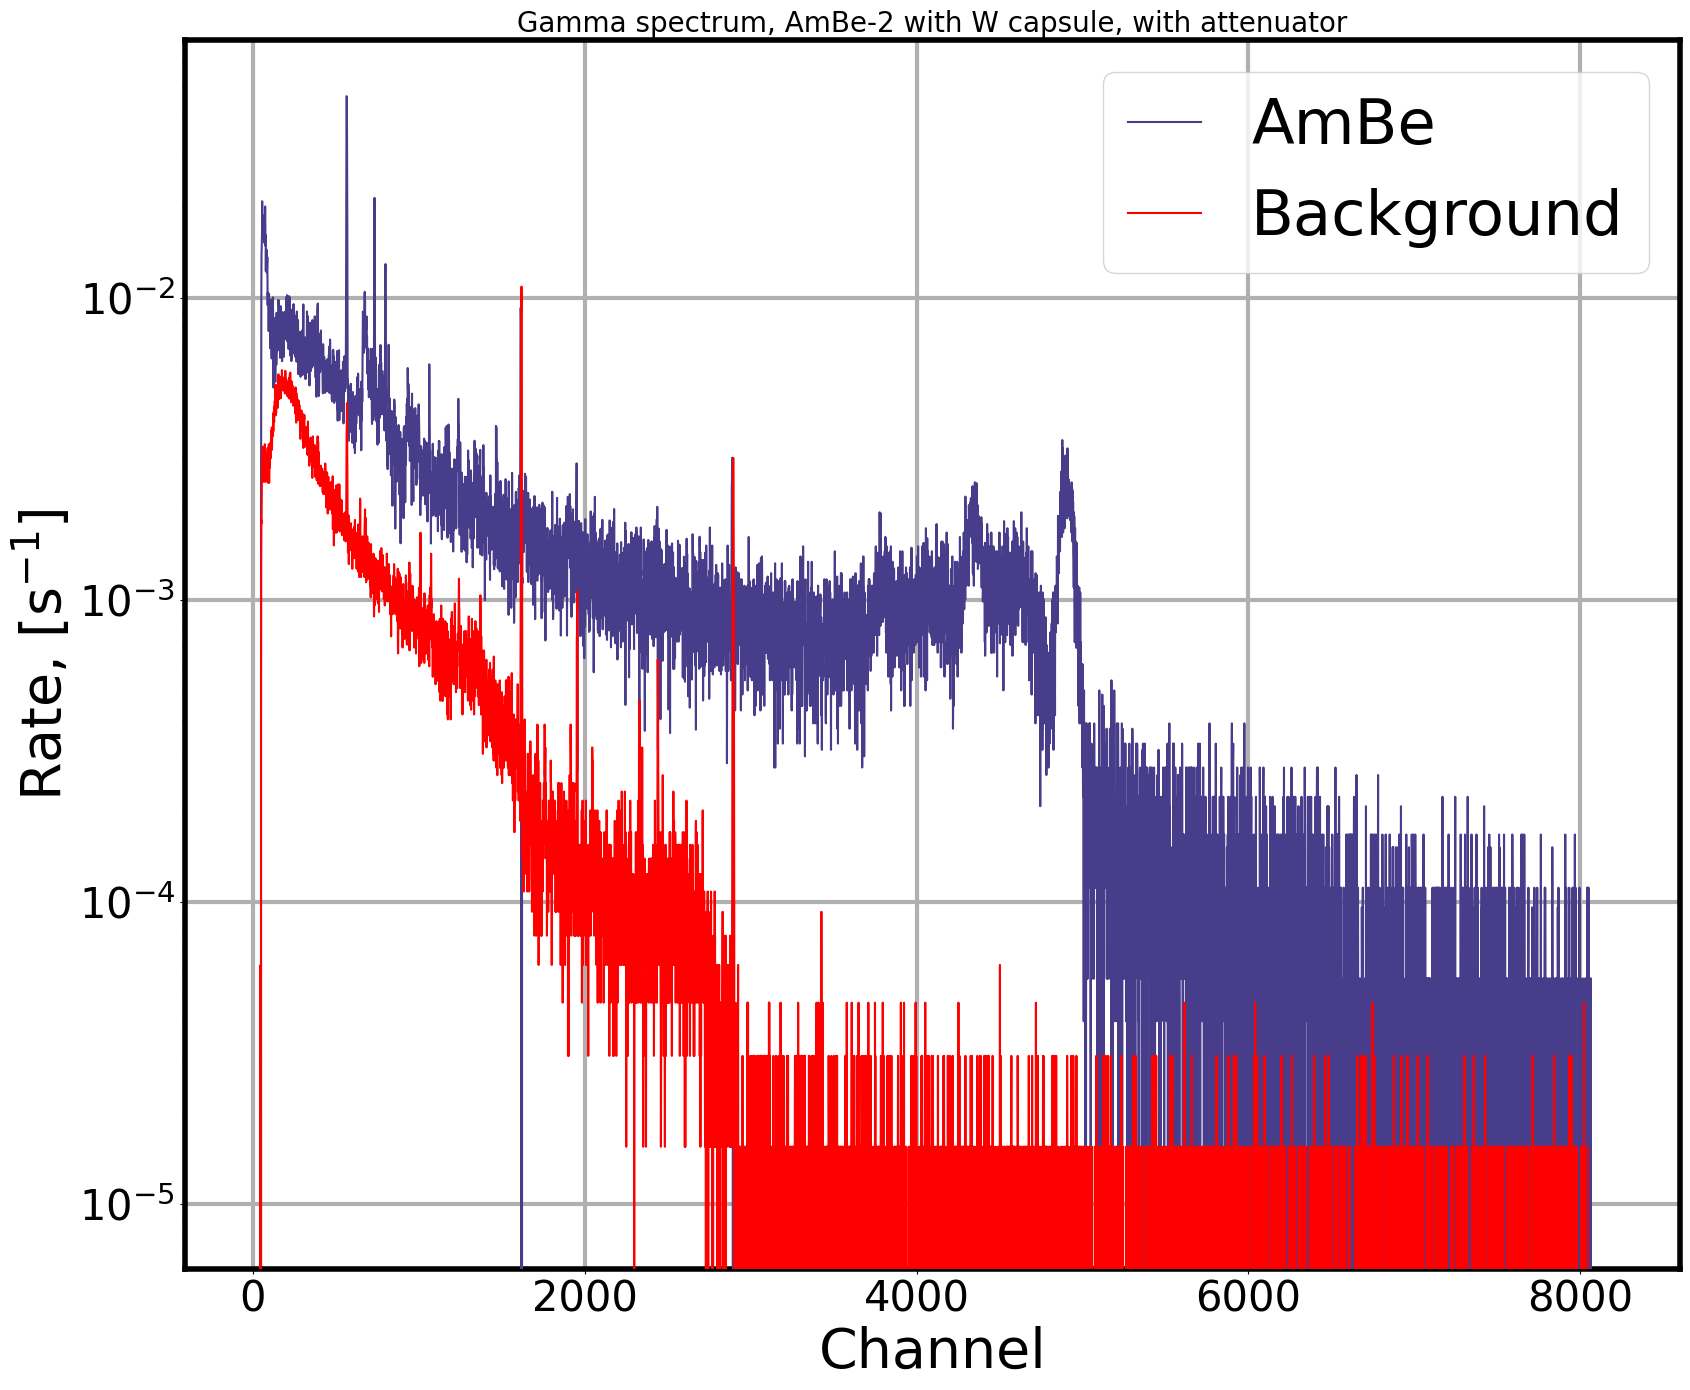

In [16]:
#plot AmBe data and background

#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65



plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, AmBe-2 with W capsule, with attenuator', fontsize=20)

#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax1.set_ylabel( u"Rate, [s$^{-1}$]", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)


Data = ax1.plot(np.asarray(scan[0][0]), np.asarray(scan[0][1])/t - (np.asarray(bkg))/t_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)
Bkg = ax1.plot(np.asarray(scan[1][0]), np.asarray(bkg)/t_bkg, 
                          color="red", label="Background", **error_kwargs)

ax1.set_yscale('log')


fig.tight_layout()


ax1.grid() # add grid to the plot

plt.legend(prop={'size': 45})

#save and show the plot
#plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_ADC-Ch.png", bbox_inches ='tight')
plt.show()


<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, AmBe-2 with W capsule on endcap, far, with attenuator')

Text(0.5, 0, 'Channel')

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Energy, [keV]')

/tmp/ipykernel_9086/3244178827.py:95: RuntimeWarning: invalid value encountered in sqrt
  rate_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[3750:5250]-np.asarray(bkg[3750:5250])/t_bkg*t)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 264.9 (χ²/ndof = 1.3)      │              Nfcn = 101              │
│ EDM = 9.65e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │  4.62e3   │  0.23e3   │            │            │         │         │       │
│ 1 │ sig    │   44.4    │    1.7    │            │            │         │         │       │
│ 2 │ mu     │ 4.9015e3  │ 0.0008e3  │            │            │         │         │       │
│ 3 │ offset │    2.5    │    1.0    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────┐
│        │        A      sig       mu   offset │
├────────┼─────────────────────────────────────┤
│      A │ 5.46e+04    348.2     10.2   -213.1 │
│    sig │    348.2     2.82      0.0     -1.5 │
│     mu │     10.2      0.0    0.602     -0.0 │
│ offset │   -213.1     -1.5     -0.0    0.924 │
└────────┴─────────────────────────────────────┘

<ValueView A=4621.015972612804 sig=44.38742691302006 mu=4901.545555580161 offset=2.4502452099177447>
<ErrorView A=233.56405392386534 sig=1.6779509835797448 mu=0.7756972233523677 offset=0.9612864699113588>
(4621.015972612804, 44.38742691302006, 4901.545555580161, 2.4502452099177447)


/tmp/ipykernel_9086/3244178827.py:257: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

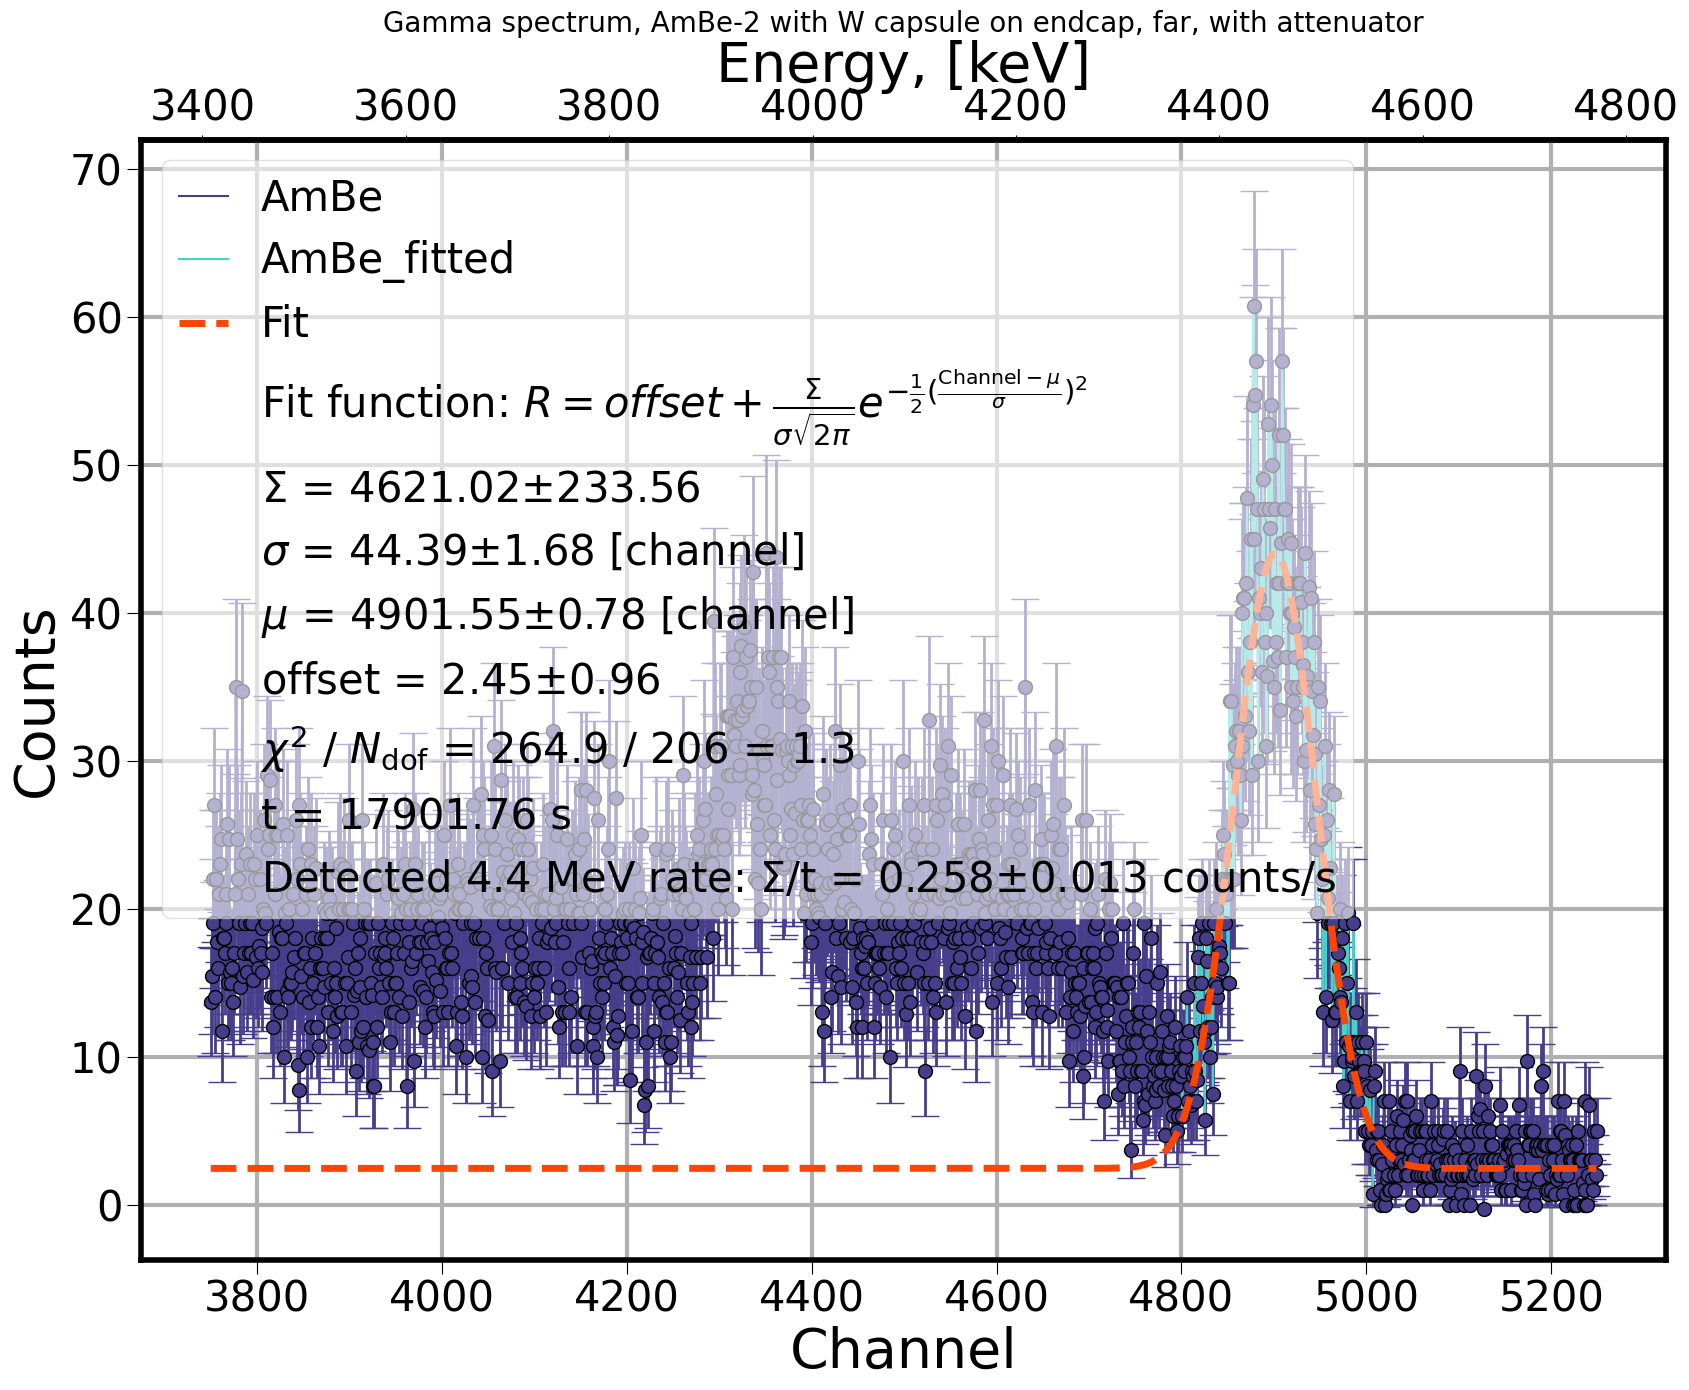

In [17]:

#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares


# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.secondary_xaxis("top", functions=(f,g))

plt.title('Gamma spectrum, AmBe-2 with W capsule on endcap, far, with attenuator', fontsize=20)




#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    


for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
ax2.set_xlabel( "Energy, [keV]", fontsize=40)

for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)  

    
ax1.tick_params(length=10)

fig.tight_layout()


#plot data with errorbars
#Data_err = ax1.errorbar(scan[0], np.asarray(scan[1])*1e6, 
     #   yerr=np.asarray(scan[num][4])*1e6, fmt='o', mec='black',  mew=1, 
       # color = 'blue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

#on top plot the same data w/o errorbars with nicer markers, give name to add to the legend

channels=np.asarray(scan[0][0][3750:5250])
rate_no_bkg=np.asarray(scan[0][1])[3750:5250]-np.asarray(bkg[3750:5250])/t_bkg*t
rate_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[3750:5250]-np.asarray(bkg[3750:5250])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][4800:5010])
rate_no_bkg_to_fit=np.asarray(scan[0][1])[4800:5010]-np.asarray(bkg[4800:5010])/t_bkg*t
rate_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[4800:5010]-np.asarray(bkg[4800:5010])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, rate_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, rate_no_bkg, yerr=np.array(rate_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, rate_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, rate_no_bkg_to_fit, rate_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 4479
mu00 = 4909
sig00 = 45 
offset00 = 4

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    #fit.append(normal_distribution(t, *argtuple))
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, rate_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(rate_no_bkg) - minuit.nfit} = {minuit.fval / (len(rate_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    
    #full legend
    #leg = plt.legend(handles=[(Data_w_sputter_err,Data_w_sputter), Fit_w_sputter, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra, extra], 
     #                labels = [Data_w_sputter.get_label(), Fit_w_sputter.get_label(), text10, text11, text111, text112, text12, text121, text122, text13, text131, text132, text14, text141,text_chi_1],
      #               prop={'size': 20}, loc = 'upper left', fancybox=True, framealpha=0.6)

#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 30}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)




extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(rate_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(rate_no_bkg_to_fit) - minuit.nfit) :.1f}",
      r't'+' = {} s'.format(t),

      r'Detected 4.4 MeV rate: $\Sigma$/t'+' = {}$\pm${} counts/s'.format(round(Decimal(minuit.values['A']/t),number_sigdigs(minuit.errors['A']/t)), 
                                        round(Decimal(minuit.errors['A']/t),number_sigdigs(minuit.errors['A']/t)))


     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)




fig.tight_layout()

#ax1.set_xlim(3750,5250)

ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 30}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_withW_withAt_ADC-Ch_fit_4400keV-photopeak_counts_far_detected.png", bbox_inches ='tight')
plt.show()
